In [10]:
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt

In [11]:
(train_images, train_labels), (test_images, test_labels) = datasets.cifar10.load_data()

train_images, test_images = train_images / 255.0, test_images / 255.0

In [12]:
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(10))

In [13]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

history = model.fit(train_images, train_labels, epochs=10, 
                    validation_data=(test_images, test_labels))

Epoch 1/10
1563/1563 [==============================] - 26s 16ms/step - loss: 1.4983 - accuracy: 0.4533 - val_loss: 1.2532 - val_accuracy: 0.5466
Epoch 2/10
1563/1563 [==============================] - 25s 16ms/step - loss: 1.1546 - accuracy: 0.5905 - val_loss: 1.0853 - val_accuracy: 0.6157
Epoch 3/10
1563/1563 [==============================] - 25s 16ms/step - loss: 1.0070 - accuracy: 0.6450 - val_loss: 1.0409 - val_accuracy: 0.6420
Epoch 4/10
1563/1563 [==============================] - 25s 16ms/step - loss: 0.9137 - accuracy: 0.6776 - val_loss: 0.9325 - val_accuracy: 0.6808
Epoch 5/10
1563/1563 [==============================] - 25s 16ms/step - loss: 0.8451 - accuracy: 0.7041 - val_loss: 0.9292 - val_accuracy: 0.6782
Epoch 6/10
1563/1563 [==============================] - 25s 16ms/step - loss: 0.7846 - accuracy: 0.7263 - val_loss: 0.8727 - val_accuracy: 0.6960
Epoch 7/10
1563/1563 [==============================] - 25s 16ms/step - loss: 0.7360 - accuracy: 0.7417 - val_loss: 0.8944 -

313/313 - 2s - loss: 0.8834 - accuracy: 0.7113 - 2s/epoch - 5ms/step
0.7113000154495239


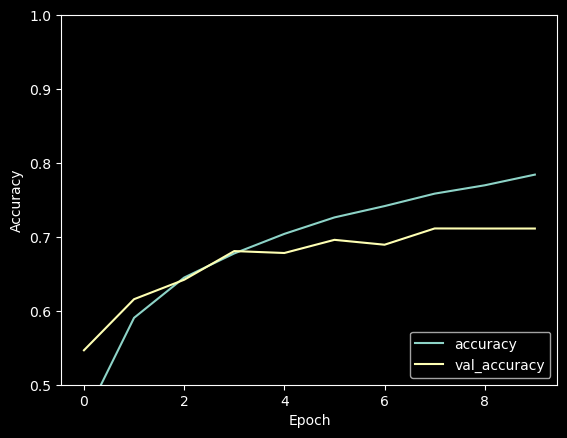

In [14]:
plt.style.use('dark_background')
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.5, 1])
plt.legend(loc='lower right')

test_loss, test_acc = model.evaluate(test_images,  test_labels, verbose=2)
print(test_acc)